Watershed is a transformation on grayscale images. The aim of this technique is to segment the image, typically when two regions-of-interest are close to each other — i.e, their edges touch

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

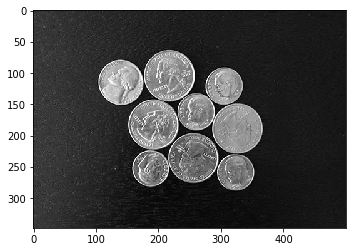

In [2]:
coins = cv2.imread('coins.jpg',0)
plt.imshow(coins,cmap='gray')

In [3]:
#Take Image in Grayscale
#Median Blur
#Binary Threshold
#Find Contours

blur = cv2.medianBlur(coins.copy(),5)

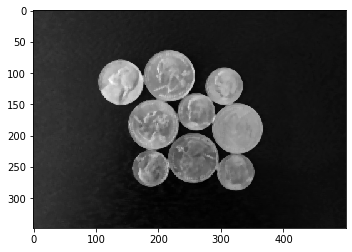

In [4]:
plt.imshow(blur,cmap='gray')

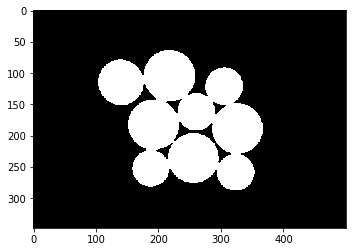

In [5]:
ret,thresh = cv2.threshold(blur.copy(),70,255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

In [6]:
contours,hierarchy = cv2.findContours(thresh.copy(),
                                      cv2.RETR_CCOMP,
                                     cv2.CHAIN_APPROX_SIMPLE)

In [7]:
len(contours)

8

external count 2


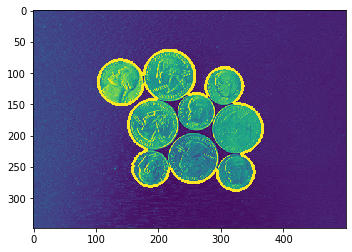

In [8]:
count = 0
for idx,item in enumerate(hierarchy[0]):
    if item[3] == -1 :
        count = count + 1
        t=cv2.drawContours(coins.copy(),contours,idx,(255,0,0),3)

print('external count', count)
plt.imshow(t)

As we can see the above method is unable to separate coins to perfection. We are looking for distinct identification

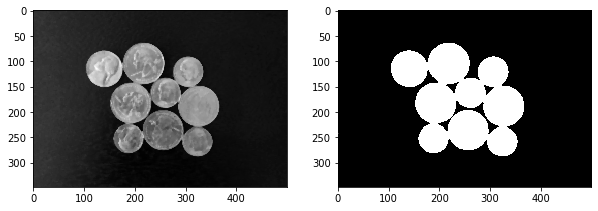

In [9]:
blur = cv2.medianBlur(coins.copy(),5)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(blur,cmap='gray')
ret,thresh = cv2.threshold(blur.copy(),69,255, 
                           cv2.THRESH_BINARY)
plt.subplot(122)
plt.imshow(thresh,cmap='gray')

In [10]:
#Apply distance transform

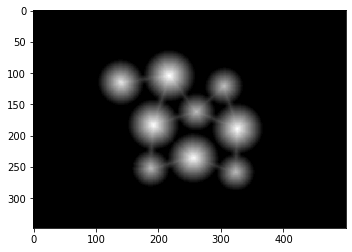

In [11]:
dist_trans = cv2.distanceTransform(thresh.copy(),cv2.DIST_L2,3)
plt.imshow(dist_trans,cmap='gray')

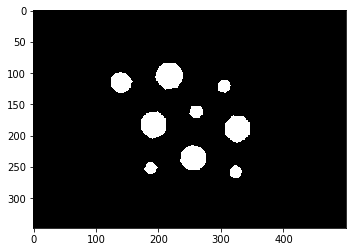

In [12]:
ret, sure_fg = cv2.threshold(dist_trans.copy(), 0.5*dist_trans.max(),255,0)
plt.imshow(sure_fg,cmap='gray')

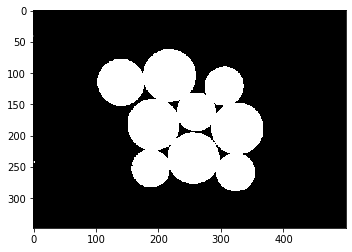

In [13]:
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.dilate(thresh.copy(),kernel,5)
plt.imshow(sure_bg,cmap='gray')

In [14]:
sure_fg = np.uint8(sure_fg)

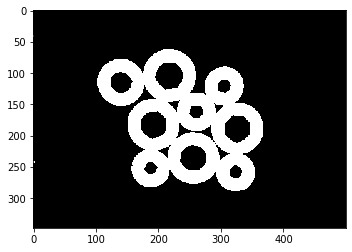

In [15]:
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap='gray')

In [16]:
#Label Markers

In [17]:
ret, markers = cv2.connectedComponents(sure_fg)
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [18]:
markers = markers+1

In [19]:
markers[unknown == 255] = 0

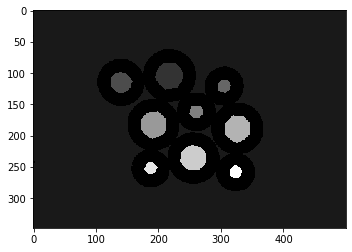

In [20]:
plt.imshow(markers,cmap='gray')

In [21]:
#Apply watershed algo

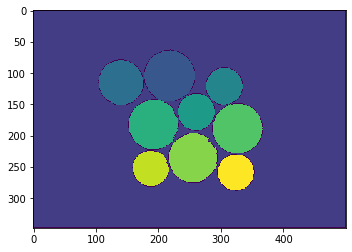

In [22]:
coins = cv2.imread('coins.jpg')
markers = cv2.watershed(coins.copy(),markers)
plt.imshow(markers)